<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Method: `bhp` slices

Develop a method for slicing `bhp` by $\Delta t_1$ or $\Delta t_2$.

* Load `bhp` (or `bhm` $\rightarrow$ `bhp`)
* Plot `bhp`
* Select by $\Delta t_1$ or $\Delta t_2$
* Plot that distribution
* Look at average energies

In [62]:
import numpy as np
import scipy.io as sio
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.pyplot import cm 
import inspect
import seaborn as sns
sns.set(style='ticks')

In [7]:
# Load the bicorr.py functions I have already developed
sys.path.append('../scripts')

import bicorr as bicorr
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [8]:
%load_ext autoreload
%autoreload 2

# Load `det_df`, channel lists

In [9]:
os.listdir('../meas_info/')

['detector_distances.xlsx',
 'detector_positions.xlsx',
 'det_df.csv',
 'det_df.pkl',
 'det_df_pairs_angles.csv',
 'det_df_pairs_angles.pkl',
 'lanl_detector_angles.mat',
 'lanl_detector_angles_note.md']

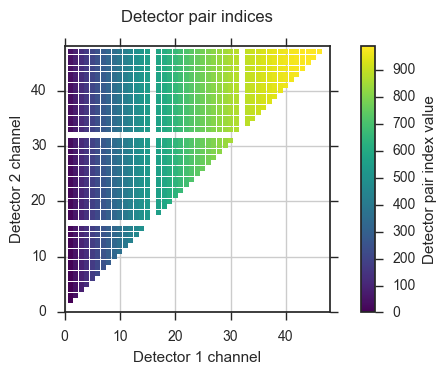

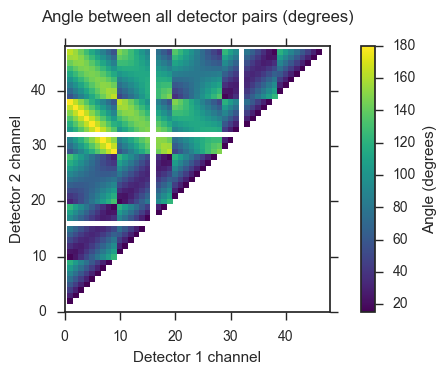

In [10]:
det_df = bicorr.load_det_df('../meas_info/det_df_pairs_angles.csv',plot_flag=True)

In [11]:
chList, fcList, detList, num_dets, num_det_pairs = bicorr.build_ch_lists(print_flag=True)

Fission chamber channels: [ 0 16 32]
Detector channels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Number of detectors: 45
Number of detector pairs: 990


# Load `bhp` data

Do I have a `bhp` distribution saved that I can load directly? I would rather not have to load and revive `bhm` because it requires so much memory.

Work with data from `Cf072115_to_Cf072215b` analysis.

In [12]:
os.listdir('../analysis/Cf072115_to_Cf072215b/')

['.ipynb_checkpoints',
 'analysis.pptx',
 'analysis_Asym_v_emin.ipynb',
 'analysis_bicorr_plots_gifs.html',
 'analysis_bicorr_plots_gifs.ipynb',
 'analysis_build_bhp_nn_by_pair_1_ns.html',
 'analysis_build_bhp_nn_by_pair_1_ns.ipynb',
 'analysis_counts_v_angle.ipynb',
 'analysis_experimental_setup_figs.html',
 'analysis_experimental_setup_figs.ipynb',
 'analysis_latex',
 'analysis_singles_counts.ipynb',
 'analysis_singles_sum.html',
 'analysis_singles_sum.ipynb',
 'analysis_slices_by_t.ipynb',
 'bhp_nn_gif.npz',
 'datap',
 'fig',
 'flux_run_notes.pptx']

In [25]:
bhp_nn_gif_data = np.load('../analysis/Cf072115_to_Cf072215b/bhp_nn_gif.npz')
print(bhp_nn_gif_data.files)

['bhp_nn_neg_mean', 'th_bin_edges', 'dt_bin_edges_neg', 'vmax_nn_rel', 'norm_factor', 'vmin_nn', 'dt_bin_edges', 'bhp_nn_pos_mean', 'num_fissions', 'bhp_nn_pos_rel', 'bhp_nn_diff_rel', 'bhp_nn_pos', 'bhp_nn_diff', 'vmax_nn', 'bhp_nn_diff_mean', 'bhp_nn_neg', 'vmin_nn_rel', 'bhp_nn_neg_rel']


In [26]:
norm_factor = bhp_nn_gif_data['norm_factor']
bhp_nn_pos  = bhp_nn_gif_data['bhp_nn_pos']
bhp_nn_neg  = bhp_nn_gif_data['bhp_nn_neg']
bhp_nn_diff = bhp_nn_gif_data['bhp_nn_diff']
th_bin_edges= bhp_nn_gif_data['th_bin_edges']
th_bin_centers = (th_bin_edges[:-1]+th_bin_edges[1:])/2
dt_bin_edges= bhp_nn_gif_data['dt_bin_edges']
dt_bin_edges_neg= bhp_nn_gif_data['dt_bin_edges_neg']

In [27]:
bhp_nn_diff.shape

(9, 800, 800)

Sum along first axis to make distribution across all angles. Multiply by norm_factor so we're working with counts (instead of normalized).

In [28]:
for i in range(len(norm_factor)):
    bhp_nn_diff[i,:,:] = norm_factor[i] * bhp_nn_diff[i,:,:]
bhp = np.sum(bhp_nn_diff,axis=0)
bhp.shape

(800, 800)

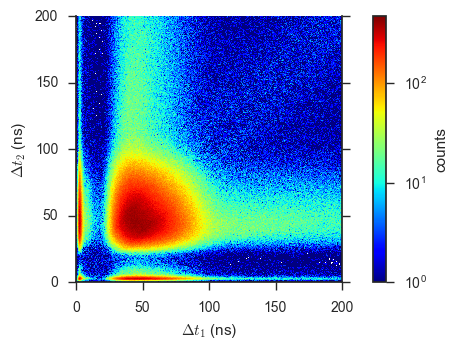

In [30]:
bicorr.bhp_plot(bhp,dt_bin_edges,show_flag = True,vmin=1)

Coarsen time binning.

In [31]:
bhp, dt_bin_edges = bicorr.coarsen_bhp(bhp, dt_bin_edges, 8, normalized = True, print_flag = True)

Dimensions of bicorr_hist_plot:  (800, 800)
Width of time bin in (ns):  0.25
Width of coarse time bin in (ns):  2.0
Condensing bhp from shape  (800, 800)  to  (100, 100)


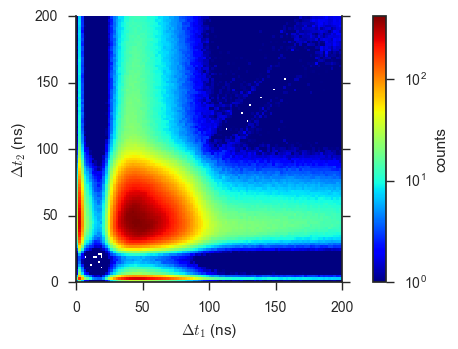

In [32]:
bicorr.bhp_plot(bhp,dt_bin_edges,show_flag = True, vmin=1)

# Sum along a specific slice for $\Delta t_1$

In [42]:
dt_bin_centers = bicorr.calc_centers(dt_bin_edges)

In [27]:
i = 25
print(dt_bin_edges[i])
print(dt_bin_edges[i+1])
print(dt_bin_centers[i])

50.0
52.0
51.0


In [28]:
t = 51
i = np.digitize(t,dt_bin_edges)-1

In [29]:
print(dt_bin_edges[i])
print(dt_bin_edges[i+1])
print(dt_bin_centers[i])

50.0
52.0
51.0


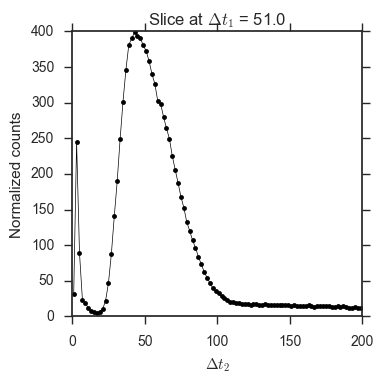

In [30]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:],'.-k',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('Slice at $\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

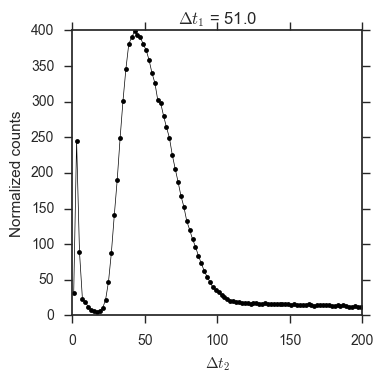

In [31]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:],'.-k',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('$\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

This works, but I need to work with the full dataset and coarsen the timing.

# Take both slices

The way I am plotting the distribution above, I am holding $\Delta t_1$ constant and looking at $\Delta t_2$. This means that I am looking at the distribution of detctor 2 with detector 1 held constant.

This introduces some bias, or more precisely, removes a biased set of channels from the distribution. 

Since detctor pairs are organizes such that `det1ch < det2ch`, I am looking at the distribution of neutron times for the higher detector channels. 

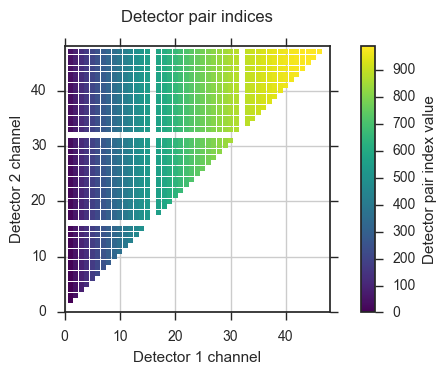

In [32]:
bicorr.plot_det_df(det_df, which='index')

In order to include all data, I need to take the sum of all detectors pairs in *both* directions. Try it out.

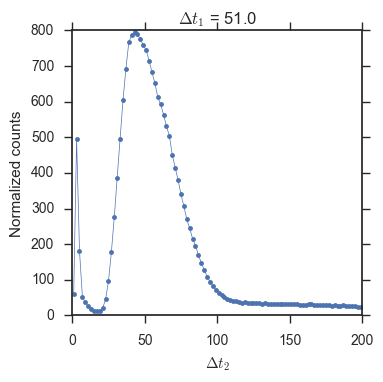

In [33]:
plt.figure(figsize=(4,4))
plt.plot(dt_bin_centers,bhp[i,:]+bhp[:,i],'.-',linewidth=.5)
plt.xlabel('$\Delta t_2$')
plt.ylabel('Normalized counts')
plt.title('$\Delta t_1$ = {}'.format(dt_bin_centers[i]))
plt.tight_layout()
plt.show()

# Normalize it

In order to compare multiple traces, I need to normalize them either by the peak or the total number. For now I am going to go with the total number. 

Create slices at a few times.

In [88]:
t_slices = [30,40,50,60,70,80,90]

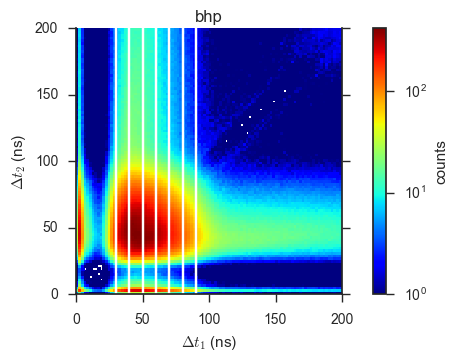

In [90]:
bicorr.bhp_plot(bhp,dt_bin_edges,title='bhp',clear=False,vmin=1)
for t in t_slices:
    plt.axvline(t,c='w')
plt.show()

In [91]:
bhp_slices = np.zeros((len(t_slices),len(dt_bin_centers)))

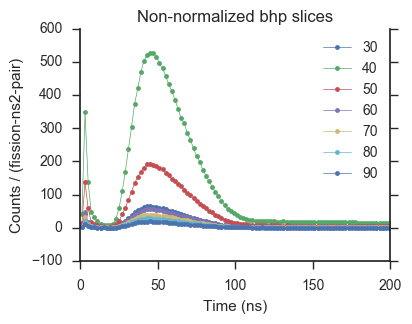

In [93]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:],'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Non-normalized bhp slices')
sns.despine(right=False)
plt.show()

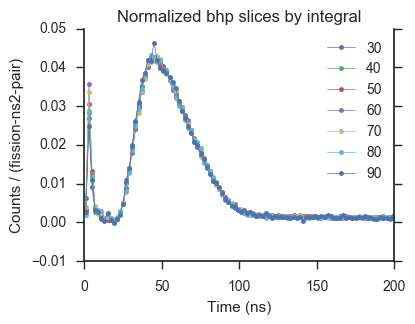

In [94]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:]/np.sum(bhp_slices[i,:]),'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Normalized bhp slices by integral')
sns.despine(right=False)
plt.show()

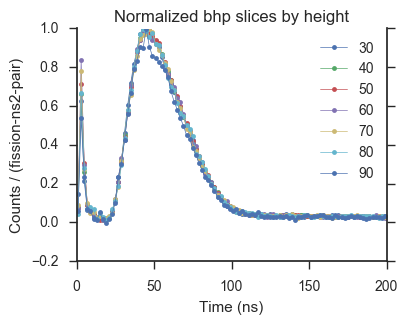

In [95]:
plt.figure(figsize=(4,3))
for t in t_slices:
    i = t_slices.index(t) # Works as long as t_slices is unique
    
    bhp_slices[i,:] = bhp[i,:]+bhp[:,i]
    plt.plot(dt_bin_centers,bhp_slices[i,:]/np.max(bhp_slices[i,:]),'.-',linewidth=.5)
plt.xlabel('Time (ns)')
plt.ylabel('Counts / (fission-ns2-pair)')
plt.legend([str(t) for t in t_slices])
plt.title('Normalized bhp slices by height')
sns.despine(right=False)
plt.show()

# Functionalize it

I want to automate the process for producing this based on a give time stamp. 

## Functionalize calculating the slice

In [33]:
help(bicorr.slice_bhp)

Help on function slice_bhp in module bicorr:

slice_bhp(bhp, dt_bin_edges, delta_tj_min, delta_tj_max=None, print_flag=False)
    Produce counts vs. \Delta t_i at constant \Delta t_j from bhp
    
    Parameters
    ----------
    bhp : ndarray
        Array to plot. Two-dimensional with axes sizes corresponding to dt_bin_edges x dt_bin_edges.
    dt_bin_edges : ndarray
        One-dimensional array of time bin edges
    delta_tj_min : float
        Time at which to slice bhp- lower boundary
    delta_tj_max : float
        Time at which to slice bhp- upper boundary. If not provided, only use one bin in which delta_tj_min exists
    print_flag : bool
        Option to print status updates
        
    Returns
    -------
    bhp_slice : ndarray
        Slice through bhp at delta_tj_min
    slice_dt_range : list
        Two-element list
        Lower and upper bound of slice time window
        slice_dt_range[0] = lower time bound, slice_dt_range[1] = upper time bound



In [96]:
bhp_slice, slice_dt_range = bicorr.slice_bhp(bhp,dt_bin_edges,50.0,53.0,True)

Creating slice through bhp for times from 50.0 to 54.0


## Functionalize creating bhp_slices

Need to create a bunch of slices at once from t_slices. For now just do t_slices, don't specify max time range for each slice. 

In [97]:
t_slices
print(t_slices)

[30, 40, 50, 60, 70, 80, 90]


In [98]:
bhp_slices, slice_dt_ranges = bicorr.slices_bhp(bhp,dt_bin_edges,t_slices)

## Functionalize plotting

In [169]:
help(bicorr.plot_bhp_slice)

Help on function plot_bhp_slice in module bicorr_plot:

plot_bhp_slice(bhp_slice, bin_edges, slice_range=None, normalized=None, c='k', title=False, show_flag=False, save_flag=False, save_filename='bhp_slice', save_folder='fig', new_fig=True, clear=True, msize=5, norm_range=None)
    Plot bhp slice.
    
    Parameters
    ----------
    bhp_slice : ndarray
        Slice through bhp at delta_tj_min, produce with slice_bhp()
    bin_edges : ndarray
        One-dimensional array of bin edges
    slice_range : array or float, optional
        Range of time or energy values over which slice was taken. Primarily used for creating a title or legend
        if None: not provided
        if array: Min and max of slice range, ex: [slice_dt_min, slice_dt_max]
        if float: Slice position, ex: slice_dt_middle
    normalized : str, optional
        None: Don't normalize
        'int': Normalize by integral
        'max': Normalize by height
    c : str, optional
        Color of step plot
    t

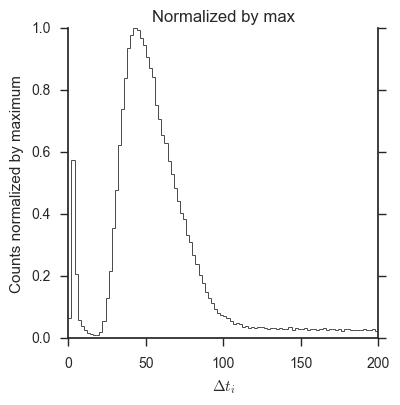

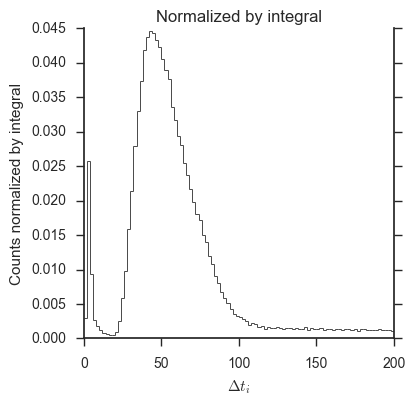

In [167]:
bicorr_plot.plot_bhp_slice(bhp_slice, dt_bin_edges, slice_range = slice_dt_range, show_flag = True, normalized='max', title='Normalized by max')

bicorr_plot.plot_bhp_slice(bhp_slice, dt_bin_edges, slice_range = slice_dt_range, show_flag = True, normalized='int', title='Normalized by integral')

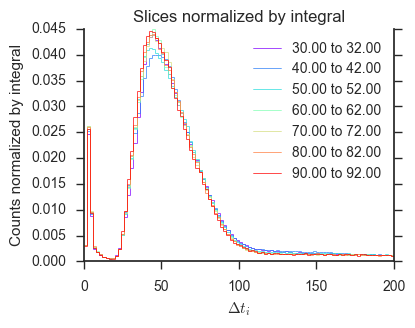

In [173]:
bicorr_plot.plot_bhp_slices(bhp_slices,dt_bin_edges,slice_dt_ranges);

# Convert to energy space

## Time to energy

In [131]:
energy_bin_edges = np.asarray(np.insert([bicorr.convert_time_to_energy(t) for t in dt_bin_edges[1:]],0,10000))

How do time and energy relate?

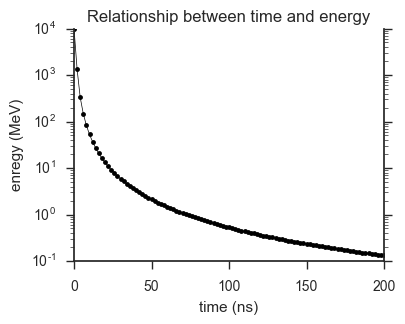

In [132]:
plt.figure(figsize=(4,3))
plt.plot(dt_bin_edges,energy_bin_edges,'.-k',linewidth=.5)
plt.yscale('log')
plt.xlabel('time (ns)')
plt.ylabel('enregy (MeV)')
sns.despine(right=False)
plt.title('Relationship between time and energy')
plt.show()

# Summary

The problem here is that the distance to each detector is slightly different so the conversion is different for each detector. 

I did some analysis to show that the conversion introduces an error large enough that we need to go back to the `bicorr` script and make `bhm_e` on an event-by-event basis. 

Investigate this in `methods > time_energy_bin_edges`. Create `bhm_e` in `methods > build_bhm_with_energy.ipynb`.